In [354]:
import os.path
import random
import time
import re
import importlib
import torch
import matplotlib.pyplot as plt
import numpy as np
from unityagents import UnityEnvironment
from collections import deque
import torchvision.transforms as T
%matplotlib inline



from agent import DQN_Agent
from environment import Environment
from data_handling import Logger, Saver, gather_args



class Args:
    def __init__(self):
        self.train = True
        self.nographics = False
        self.num_eps = 10
        self.rollout = 5
        self.batchsize = 64
        self.pretrain = 1000
        self.num_episodes = 5
        self.max_time = 50
        self.alr = 1e-4
        self.clr = 1e-4
        self.batch = 128
        self.buffer = 100000
        self.C = 4000        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")     
        self.pixels = False
        self.eval = False
        self.framework = "DDQN"
        self.prioritized_experience_replay = False
        self.save_dir = "saves"
        self.load_file = False
        self.quiet = False
        self.save_every = 2
args = Args()
def check_args():
    for arg in vars(args):
        if arg == "sep": continue
        print("{}: {}".format(arg.upper(), getattr(args, arg)))
        
        
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [2]:
env = Environment(args, id=1)

##################################################
#                                                #


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


#                                                #
##################################################


In [51]:
def train(agent, args, env, saver):
    """
    Train the agent.
    """

    logger = Logger(agent, args, saver.save_dir, log_every=50)

    # Pre-fill the Replay Buffer
    agent.initialize_memory(args.pretrain, env)

    #Begin training loop
    for episode in range(1, args.num_episodes+1):
        # Begin each episode with a clean environment
        done = False
        env.reset()
        # Get initial state
        state = env.state
        # Gather experience until done or max_steps is reached
        while not done:
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            if done:
                next_state = None

            agent.step(state, action, reward, next_state)
            state = next_state

            logger.log(reward, agent)


        saver.save_checkpoint(agent, args.save_every)
        agent.new_episode()
        logger.step(episode, agent.epsilon)

    saver.save_final(agent)
    logger.graph()
    return True
env.reset()

In [52]:
args.pretrain = 75
args.quiet = False

In [355]:
import models
import agent
import buffers
import environment
import utils
import data_handling
importlib.reload(models)
importlib.reload(agent)
importlib.reload(buffers)
importlib.reload(environment)
importlib.reload(utils)
importlib.reload(data_handling)
from environment import Environment
from agent import DQN_Agent
from models import QNetwork
from utils import check_dir
from buffers import ReplayBuffer
from data_handling import Saver, Logger

In [58]:
env.reset()
agent = DQN_Agent(env.state_size,
                  env.action_size,
                  args)

saver = Saver(agent.framework, agent, args.save_dir, args.load_file)

##################################################
#                                                #
    Saving to base filename: DDQN_20190311_v7     
#                                                #
##################################################


##################################################
#                                                #
          Starting training at: 21:05:36          
#                                                #
##################################################
##################################################
#                                                #
                   TRAIN: True                    
                NOGRAPHICS: False                 
                   NUM_EPS: 10                    
                  BATCHSIZE: 64                   
                   PRETRAIN: 75                   
                 NUM_EPISODES: 5                  
                   MAX_TIME: 50                   
                   ALR: 0.0001                    
                   CLR: 0.0001                    
                    BATCH: 128                    
                  BUFFER: 100000                  
                  PIXELS: False                   
       PRIORITIZED_EXPERIENCE_R

True

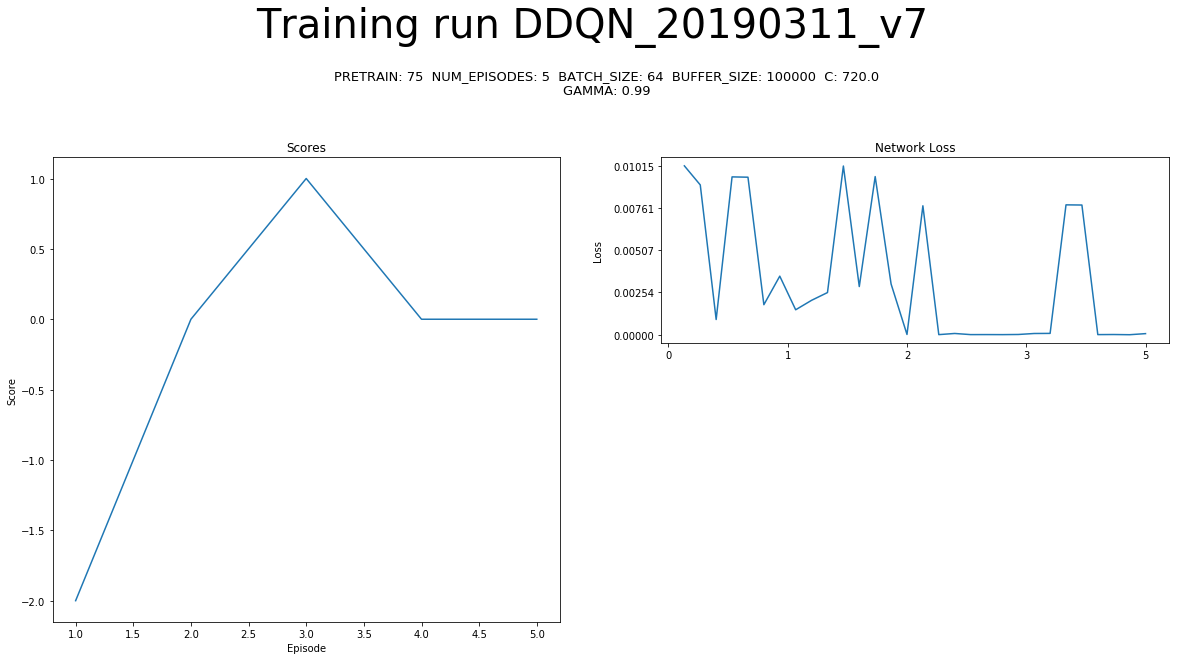

In [59]:
train(agent, args, env, saver)

In [405]:
importlib.reload(data_handling)
from data_handling import Saver, Logger
l = Logger()

Blank init for Logger object.


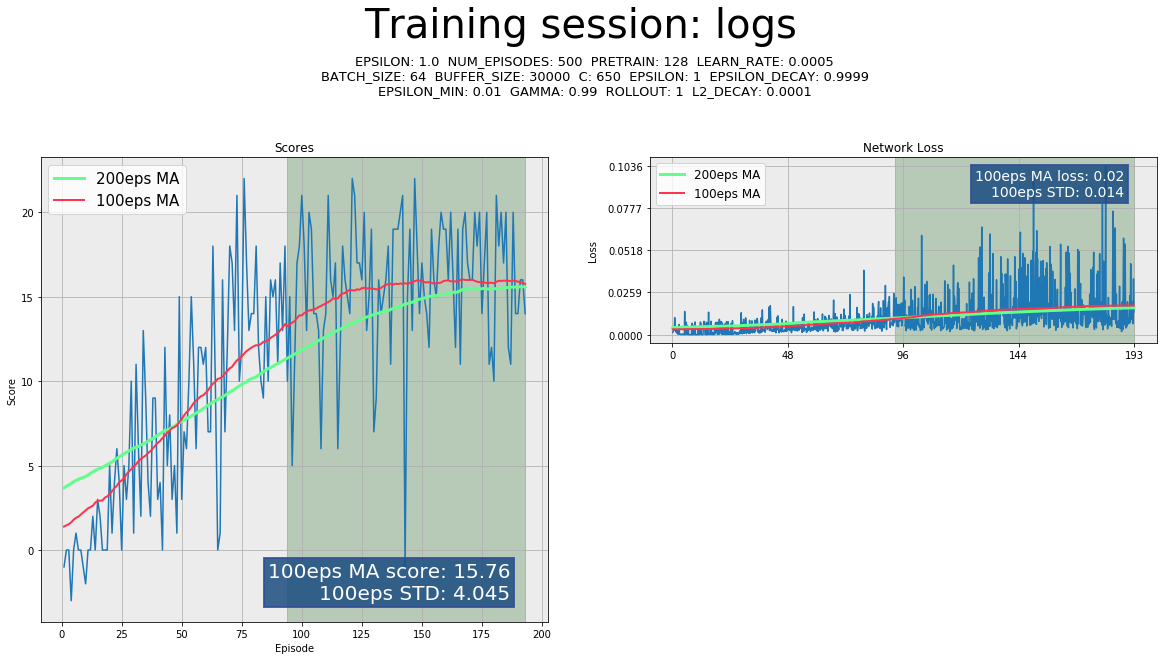

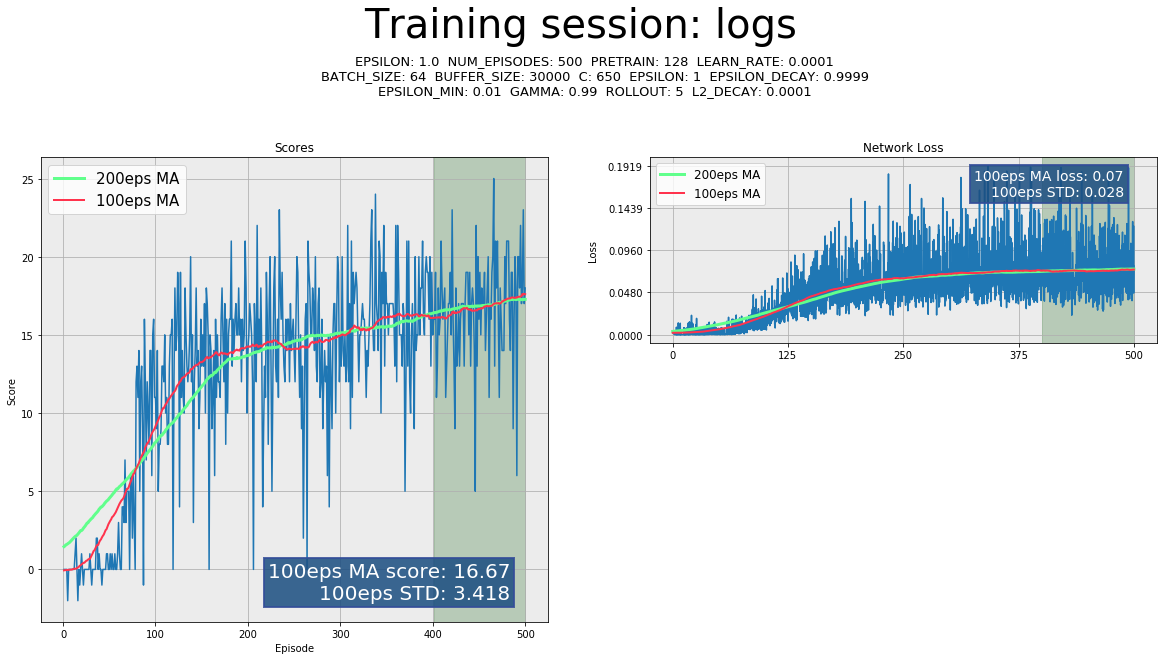

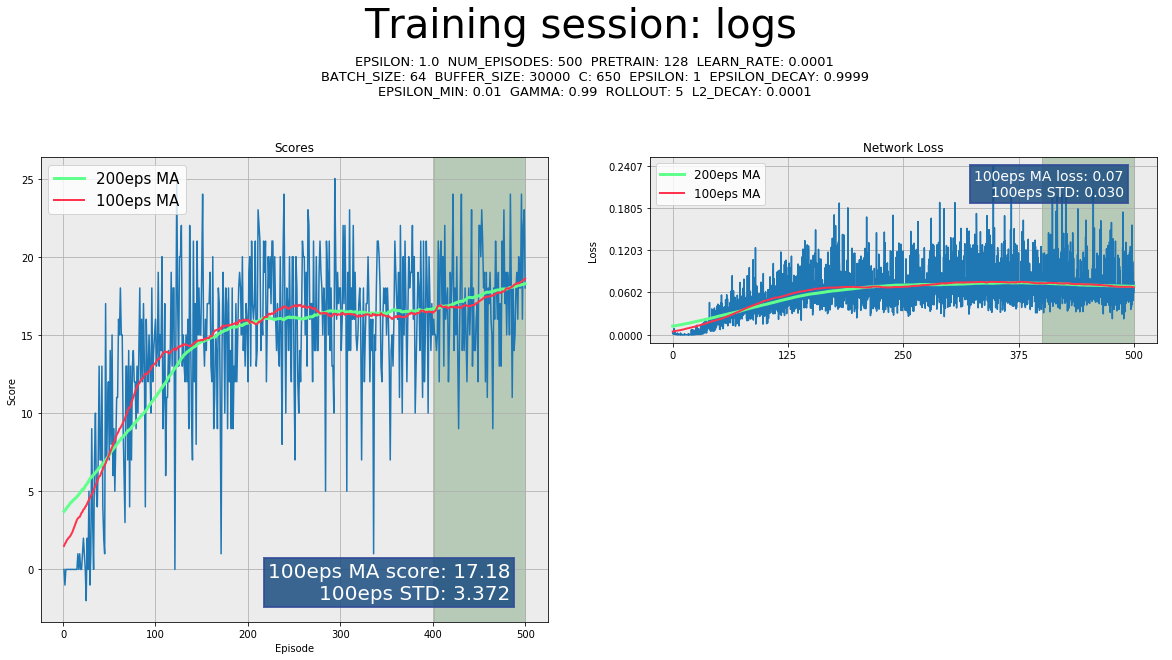

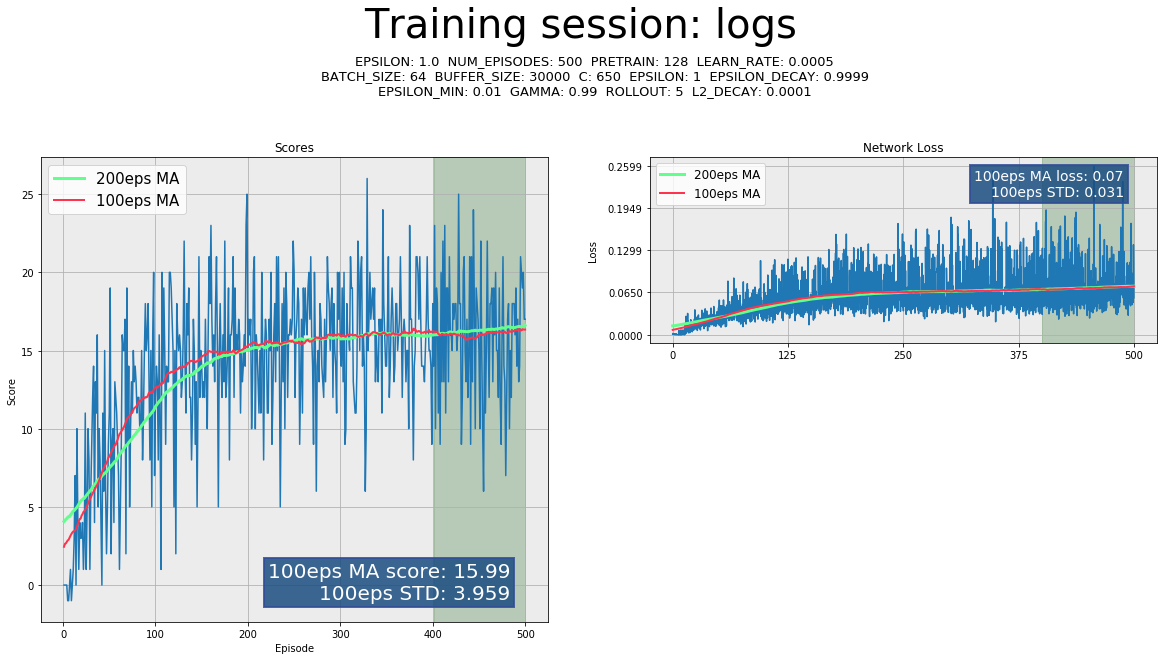

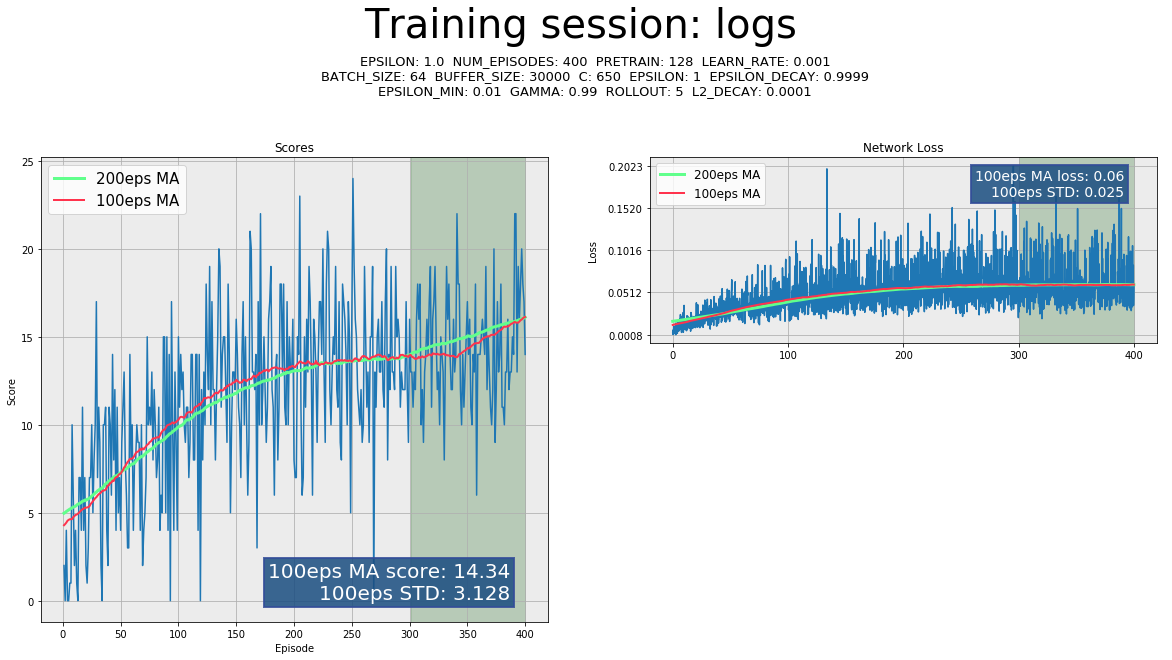

In [409]:
f1= "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p1_navigation\\saves\\DDQN_20190312_v13\\logs"
l.graph(f1, False)
f1= "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p1_navigation\\saves\\DDQN_20190312_v4\\logs"
l.graph(f1, False)
f1= "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p1_navigation\\saves\\DDQN_20190312_v3\\logs"
l.graph(f1, False)
f3= "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p1_navigation\\saves\\DDQN_20190312_v2\\logs"
l.graph(f3, False)
f1= "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p1_navigation\\saves\\DDQN_20190312_v1\\logs"
l.graph(f1, False)


In [79]:
env.close()